In [41]:
# import warnings # for debugging
# warnings.filterwarnings('error') # prints line number of warning, supposedly

import numpy as np
import ROOT

def buildDataFrame(fileName, treeName):
    df = ROOT.RDataFrame(treeName, fileName)

    df = df.Define('pip2_m2', 'pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz') \
           .Define('pim_m2', 'pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz') \
           .Define('ks_E', 'pip2_E + pim_E') \
           .Define('ks_px', 'pip2_px + pim_px') \
           .Define('ks_py', 'pip2_py + pim_py') \
           .Define('ks_pz', 'pip2_pz + pim_pz') \
           .Define('ks_m', 'TMath::Sqrt(ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz)') \
           .Define('ks_m2', 'ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz') \
           .Define('delta_E', 'pip1_E + p_E') \
           .Define('delta_px', 'pip1_px + p_px') \
           .Define('delta_py', 'pip1_py + p_py') \
           .Define('delta_pz', 'pip1_pz + p_pz') \
           .Define('delta_m', 'TMath::Sqrt(delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz)') \
           .Define('delta_m2', 'delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz') \
           .Define('lambda_E', 'p_E + km_E') \
           .Define('lambda_px', 'p_px + km_px') \
           .Define('lambda_py', 'p_py + km_py') \
           .Define('lambda_pz', 'p_pz + km_pz') \
           .Define('lambda_m', 'TMath::Sqrt(lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz)') \
           .Define('lambda_m2', 'lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz') \
           .Define('kmpip1_E', 'pip1_E + km_E') \
           .Define('kmpip1_px', 'pip1_px + km_px') \
           .Define('kmpip1_py', 'pip1_py + km_py') \
           .Define('kmpip1_pz', 'pip1_pz + km_pz') \
           .Define('kmpip1_m', 'TMath::Sqrt(kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz)') \
           .Define('kmpip1_m2', 'kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz') \
           .Define('kspip1_E', 'pip1_E + ks_E') \
           .Define('kspip1_px', 'pip1_px + ks_px') \
           .Define('kspip1_py', 'pip1_py + ks_py') \
           .Define('kspip1_pz', 'pip1_pz + ks_pz') \
           .Define('kspip1_m', 'TMath::Sqrt(kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz)') \
           .Define('kspip1_m2', 'kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz') \
           .Define('KKpi_E', 'pip1_E + km_E + ks_E') \
           .Define('KKpi_px', 'pip1_px + km_px + ks_px') \
           .Define('KKpi_py', 'pip1_py + km_py + ks_py') \
           .Define('KKpi_pz', 'pip1_pz + km_pz + ks_pz') \
           .Define('KKpi_m', 'TMath::Sqrt(KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz)') \
           .Define('KKpi_m2', 'KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz')

    return df

dfKKpi = buildDataFrame("KKpi_flat_bestX2_2017.root", "pipkmks__B4_M16;1")


## Cuts

In [42]:
# Define cuts

pathlength_sig = 'pathlength_sig > 5' # pathlength significance cut
reject_delta = 'delta_m > 1.4' # delta++ cut
reject_lambda = 'lambda_m > 1.9' # lambda cut
keep_kstar_plus = 'kspip1_m >= 0.8 && kspip1_m <= 1.0' # "charged" K*(KsPi+)
keep_kstar_zero = 'kmpip1_m >= 0.8 && kmpip1_m <= 1.0' # "neutral" K*(K-Pi+)
reject_kstar_plus = 'kspip1_m <= 0.8 || kspip1_m >= 1.0' # Reject "charged" K*(KsPi+)
reject_kstar_zero = 'kmpip1_m <= 0.8 || kmpip1_m >= 1.0' # Reject "neutral" K*(K-Pi+)
select_kShort = 'ks_m >= 0.45 && ks_m <= 0.55' # Select kShort
reject_kShort = 'ks_m <= 0.45 || ks_m >= 0.55' # Reject kShort
select_KKpi = 'KKpi_m >= 1.0 && KKpi_m <= 1.8' # Select KKpi



### kShort histogram

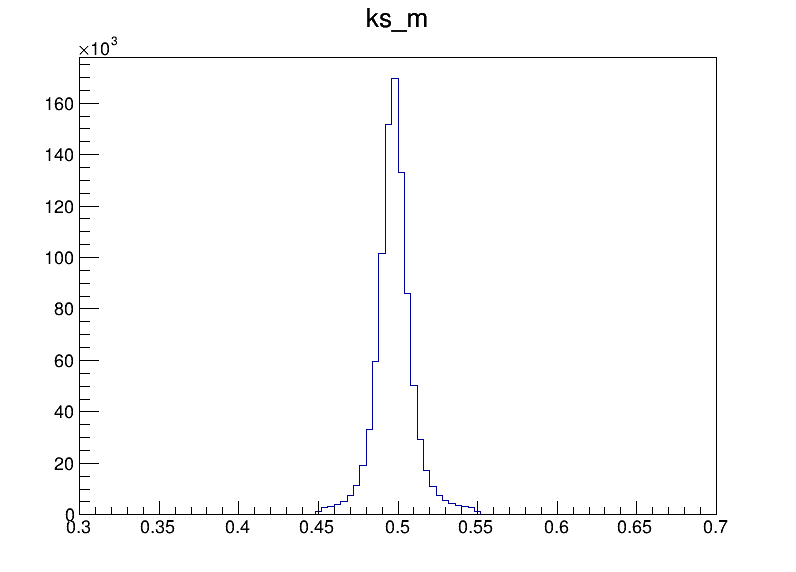

Info in <TCanvas::Print>: png file ../_plots/_TESThistogram.png has been created


In [46]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_kShort) \
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('ks_m', 'ks_m', 60, 0.3, 0.7), 'ks_m')
    h1.SetStats(False)
    h1.Draw()

    img_path = "../_plots/_TESThistogram.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


### KK $\pi$ Histogram

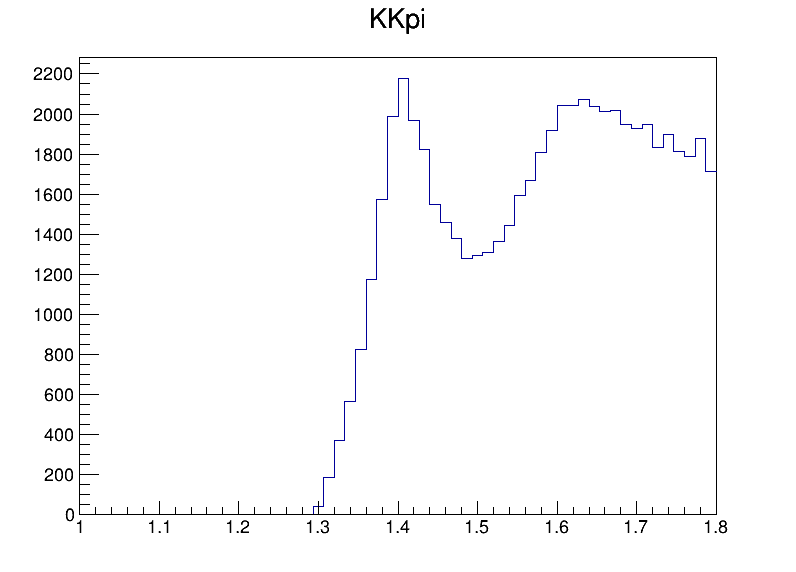

Info in <TCanvas::Print>: png file ../_plots/KKpi.png has been created


In [51]:
from IPython.display import Image, display

def plotting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Draw()
    
    img_path = "../_plots/KKpi.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

plotting(dfKKpi)

### Dalitz Plots (kShort + $\pi$+) vs. (kMinus + $\pi$+)

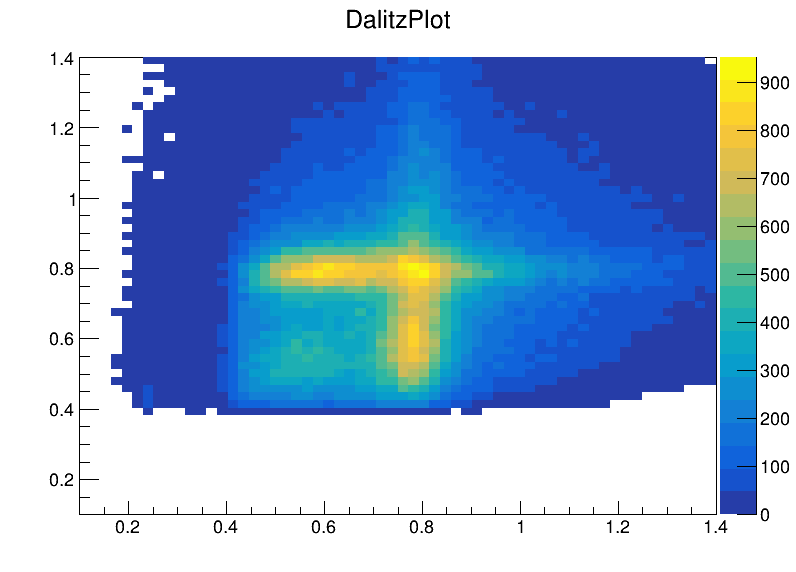

Info in <TCanvas::Print>: png file ../_plots/dalitz.png has been created


In [49]:
from IPython.display import Image, display

def dalitzPlot(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_KKpi)
    ############################

    h2 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 60, 0.1, 1.4, 60, 0.1, 1.4), 'kspip1_m2', 'kmpip1_m2')
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h2.SetStats(False)
    h2.Draw("colz")
    canvas.Update()
    
    img_path = "../_plots/_dalitzTEST.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

dalitzPlot(dfKKpi)

## Fitting: define functions

In [63]:
# Create various functions from 'ROOT' framework for fitting to histograms

# Gaussian
gaus = ROOT.TF1("gaus", "gaus", 0.4, 0.6)
gaus.SetParameter(0, 1)
gaus.SetParameter(1, 0.5)
gaus.SetParameter(2, 0.1)

# Exponential, with 2 parameters
exp = ROOT.TF1("expo", "expo", 0.4, 0.6)
exp.SetParameter(0, 1)
exp.SetParameter(1, -1)

# Exponential, with 3 parameters
exp3 = ROOT.TF1("expo3", "expo", 0.4, 0.6)
exp3.SetParameter(0, 1)
exp3.SetParameter(1, -1)
exp3.SetParameter(2, 0.1)

# Breit-Wigner function
bw = ROOT.TF1("bw", "TMath::BreitWigner(x, [0], [1])", 0.4, 0.6)
bw.SetParameter(0, 0.5)
bw.SetParameter(1, 0.1)

# Voigtian function
voigt = ROOT.TF1("voigt", "TMath::Voigt(x, [0], [1])", 0.4, 0.6)
voigt.SetParameter(0, 0.5)
voigt.SetParameter(1, 0.1)

# Voigtian with RooVoigtian
# ???

######## COMBINED FUNCTIONS ########

# Voigtian + Exponential(3 parameters)
voigt_plus_exp3 = ROOT.TF1("voigt_plus_expo3", "voigt + exp3", 0.4, 0.6)
voigt_plus_exp3.SetParameter(0, 4.5E2)
voigt_plus_exp3.SetParameter(1, 1.45807E0)
voigt_plus_exp3.SetParameter(2, 1.0E-02)
voigt_plus_exp3.SetParameter(3, 3.81110E-06)
voigt_plus_exp3.SetParameter(4, -1.0E0)



input_line_217:2:110: error: use of undeclared identifier 'exp3'
Double_t TFormula____id17114482477672915213(Double_t *x,Double_t *p){ return (TMath::Voigt(x[0],p[0],p[1]))+{exp3} ; }
                                                                                                             ^
input_line_218:2:110: error: use of undeclared identifier 'exp3'
Double_t TFormula____id17114482477672915213(Double_t *x,Double_t *p){ return (TMath::Voigt(x[0],p[0],p[1]))+{exp3} ; }
                                                                                                             ^
Error in <prepareMethod>: Can't compile function TFormula____id17114482477672915213 prototype with arguments Double_t*,Double_t*
Error in <TFormula::InputFormulaIntoCling>: Error compiling formula expression in Cling
Error in <TFormula::ProcessFormula>: "exp3" has not been matched in the formula expression
Error in <TFormula::ProcessFormula>: Formula "(TMath::Voigt(x,[p0],[p1]))+exp3" is invalid !


## Fitting: plots

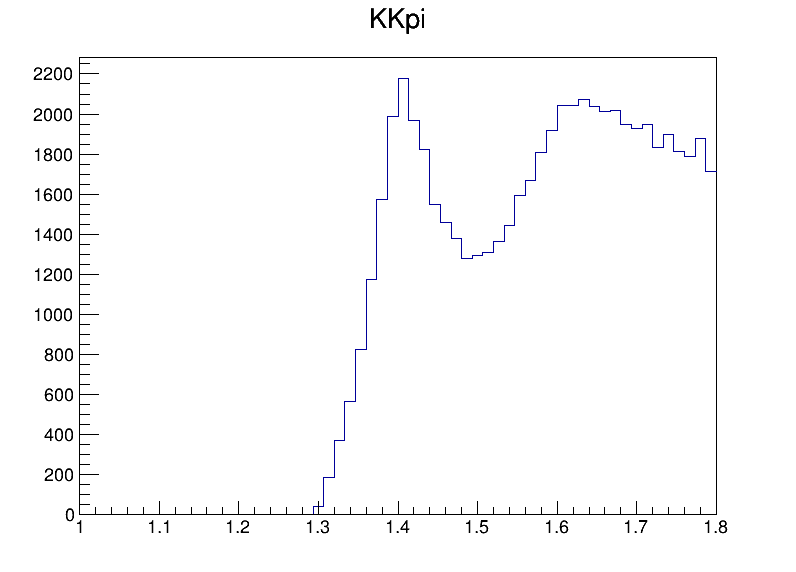

Unknown function: voigt_plus_exp3


Info in <TCanvas::Print>: png file ../_plots/_KKpi_FIT_TEST.png has been created


In [62]:
from IPython.display import Image, display

def fitting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Fit("voigt_plus_exp3", "R")
    h1.Draw()
    voigt_plus_exp3.Draw("same")
    
    img_path = "../_plots/_KKpi_FIT_TEST.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

fitting(dfKKpi)